In [1]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.5 MB/s eta 0:00:00:00:0100:01


In [9]:
import os
import yaml
import torch
from ultralytics import YOLO
from IPython.display import Image, display

In [3]:
PATH_TO_YOUR_BEST_MODEL = '/kaggle/input/brain-tumor-dataset-object-segmentation/base.pt' 
YAML_PATH = '/kaggle/working/braintumor_dataset.yaml'

In [4]:
dataset_config = {
    'path': '/kaggle/input/brain-tumor-dataset-object-segmentation/brain_tumor_dataset_yolo/brain_tumor_dataset_yolo',
    'train': 'images/train',
    'val': 'images/val',
    'nc': 3,
    'names': ['Glioma', 'Meningioma', 'Pituitary']
}

with open(YAML_PATH, 'w') as f:
    yaml.dump(dataset_config, f, default_flow_style=False)

# Model Tuning

In [5]:
model = YOLO(PATH_TO_YOUR_BEST_MODEL)

tuning_results = model.train(
    data=YAML_PATH,
    epochs=20,
    patience=10,
    batch=8,
    imgsz=640,
    mosaic=0,
    lr0=0.001,
    name='finetune_brain_tumor_run',
    project='/kaggle/working/runs'
)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/braintumor_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/brain-tumor-dataset-object-segmentation/base.pt, momentum=0.937, mosaic=0, multi_scale=False, name=finetune_brain_tumor_run, nbs=64, nms=False, opset=None, optimize=False, optimize

100%|██████████| 755k/755k [00:00<00:00, 17.5MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 7.2±4.6 MB/s, size: 25.5 KB)


train: Scanning /kaggle/input/brain-tumor-dataset-object-segmentation/brain_tumor_dataset_yolo/brain_tumor_dataset_yolo/labels/train... 4026 images, 711 backgrounds, 0 corrupt: 100%|██████████| 4737/4737 [00:10<00:00, 432.84it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/brain-tumor-dataset-object-segmentation/brain_tumor_dataset_yolo/brain_tumor_dataset_yolo/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 11.7±3.8 MB/s, size: 28.4 KB)


val: Scanning /kaggle/input/brain-tumor-dataset-object-segmentation/brain_tumor_dataset_yolo/brain_tumor_dataset_yolo/labels/val... 411 images, 101 backgrounds, 0 corrupt: 100%|██████████| 512/512 [00:01<00:00, 384.88it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/brain-tumor-dataset-object-segmentation/brain_tumor_dataset_yolo/brain_tumor_dataset_yolo/labels is not writeable, cache not saved.


Plotting labels to /kaggle/working/runs/finetune_brain_tumor_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/runs/finetune_brain_tumor_run
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.08G     0.6795     0.3738      0.954          1        640: 100%|██████████| 593/593 [01:48<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.86it/s]

                   all        512        456      0.954       0.88       0.95      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.61G     0.7458     0.4604     0.9895          1        640: 100%|██████████| 593/593 [01:44<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.18it/s]


                   all        512        456       0.91      0.895      0.935      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.63G     0.7803     0.5045      1.007          1        640: 100%|██████████| 593/593 [01:44<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.11it/s]

                   all        512        456      0.924      0.892      0.943      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.68G     0.7914     0.5201      1.012          1        640: 100%|██████████| 593/593 [01:43<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.08it/s]


                   all        512        456       0.92      0.891      0.948      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.71G      0.787     0.5108      1.006          1        640: 100%|██████████| 593/593 [01:43<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.00it/s]

                   all        512        456       0.93      0.878       0.94      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.75G     0.7782     0.4921      1.006          1        640: 100%|██████████| 593/593 [01:43<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.21it/s]

                   all        512        456      0.931       0.88      0.945      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.79G     0.7682     0.4867      1.002          1        640: 100%|██████████| 593/593 [01:43<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.12it/s]

                   all        512        456      0.947      0.895      0.951       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.82G     0.7505     0.4645      0.987          1        640: 100%|██████████| 593/593 [01:44<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.21it/s]

                   all        512        456      0.928      0.911      0.957       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.86G     0.7489     0.4529     0.9838          1        640: 100%|██████████| 593/593 [01:44<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.97it/s]

                   all        512        456      0.894      0.915      0.943      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       2.9G     0.7345     0.4322     0.9831          1        640: 100%|██████████| 593/593 [01:44<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.82it/s]

                   all        512        456       0.96        0.9      0.952      0.761


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.92G      0.725     0.4237     0.9764          2        640: 100%|██████████| 593/593 [01:45<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  8.00it/s]


                   all        512        456       0.93      0.918      0.958      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.97G     0.7201     0.4082     0.9659          2        640: 100%|██████████| 593/593 [01:45<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.85it/s]

                   all        512        456      0.937      0.907      0.952      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.01G     0.7014      0.399     0.9587          1        640: 100%|██████████| 593/593 [01:45<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.68it/s]


                   all        512        456      0.931      0.902       0.95      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.04G      0.687     0.3794     0.9517          0        640: 100%|██████████| 593/593 [01:46<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.74it/s]

                   all        512        456      0.934      0.915      0.948      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.08G     0.6781      0.376       0.95          1        640: 100%|██████████| 593/593 [01:46<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.79it/s]

                   all        512        456      0.933      0.922      0.956      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.12G      0.667     0.3638     0.9423          0        640: 100%|██████████| 593/593 [01:45<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.73it/s]

                   all        512        456      0.933      0.931      0.957      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.15G     0.6512     0.3518     0.9359          1        640: 100%|██████████| 593/593 [01:45<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.81it/s]

                   all        512        456      0.933      0.938      0.958      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.19G     0.6481      0.341      0.936          1        640: 100%|██████████| 593/593 [01:46<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.78it/s]


                   all        512        456       0.94      0.918      0.957      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.21G     0.6319     0.3321     0.9265          1        640: 100%|██████████| 593/593 [01:45<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.82it/s]

                   all        512        456      0.939      0.919      0.958      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.26G     0.6194      0.325     0.9181          1        640: 100%|██████████| 593/593 [01:45<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.85it/s]

                   all        512        456      0.933      0.931      0.957      0.791



20 epochs completed in 0.610 hours.
Optimizer stripped from /kaggle/working/runs/finetune_brain_tumor_run/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/runs/finetune_brain_tumor_run/weights/best.pt, 22.5MB

Validating /kaggle/working/runs/finetune_brain_tumor_run/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.83it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        512        456      0.939      0.919      0.958      0.792
                Glioma        135        153      0.913      0.888      0.935      0.773
            Meningioma        140        142      0.977          1      0.993      0.855
             Pituitary        154        161      0.927       0.87      0.947      0.748
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /kaggle/working/runs/finetune_brain_tumor_run


--> Hasil mAP50-95 menunjukan peningkatan yang sangat sedikit (+0.001) dari baseline. Recall tuned model mengalami kenaikan (+0.003) yang membuat class 'Meningioma' mencapai hasil sempurna (100%). Secara overall, hasil ini cukup bagus karena dengan melakukan fine-tuning dengan menurunkan learning rate, hasil setelah di train 20epoch menunjukan peningkatan performa terutama pada Recall yang menjadi main metrics evaluation.

# Model Evaluation

In [6]:
tuned_run_dir = tuning_results.save_dir
tuned_best_model_path = os.path.join(tuned_run_dir, 'weights/best.pt')
print(f"Tuned model saved in: {tuned_best_model_path}")

tuned_model = YOLO(tuned_best_model_path)

Tuned model saved in: /kaggle/working/runs/finetune_brain_tumor_run/weights/best.pt


In [7]:
print("\nEvaluating performance tuned model on the validation set")
val_results = tuned_model.val(data=YAML_PATH, split='val')

print("\n--- Tuned Model Performance ---")
print(f"mAP@50-95: {val_results.box.map:.4f}")
print(f"mAP@50:    {val_results.box.map50:.4f}")
print(f"Precision: {val_results.box.mp:.4f}")
print(f"Recall:    {val_results.box.mr:.4f}")
print("---------------------------------")


Evaluating performance tuned model on the validation set
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 39.7±18.2 MB/s, size: 24.1 KB)


val: Scanning /kaggle/input/brain-tumor-dataset-object-segmentation/brain_tumor_dataset_yolo/brain_tumor_dataset_yolo/labels/val... 411 images, 101 backgrounds, 0 corrupt: 100%|██████████| 512/512 [00:00<00:00, 839.94it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/brain-tumor-dataset-object-segmentation/brain_tumor_dataset_yolo/brain_tumor_dataset_yolo/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        512        456      0.939      0.919      0.958      0.792
                Glioma        135        153      0.913      0.888      0.935      0.772
            Meningioma        140        142      0.977          1      0.993      0.854
             Pituitary        154        161      0.928       0.87      0.947       0.75
Speed: 0.8ms preprocess, 5.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val

--- Tuned Model Performance ---
mAP@50-95: 0.7920
mAP@50:    0.9584
Precision: 0.9392
Recall:    0.9192
---------------------------------



Displaying Confusion Matrix:


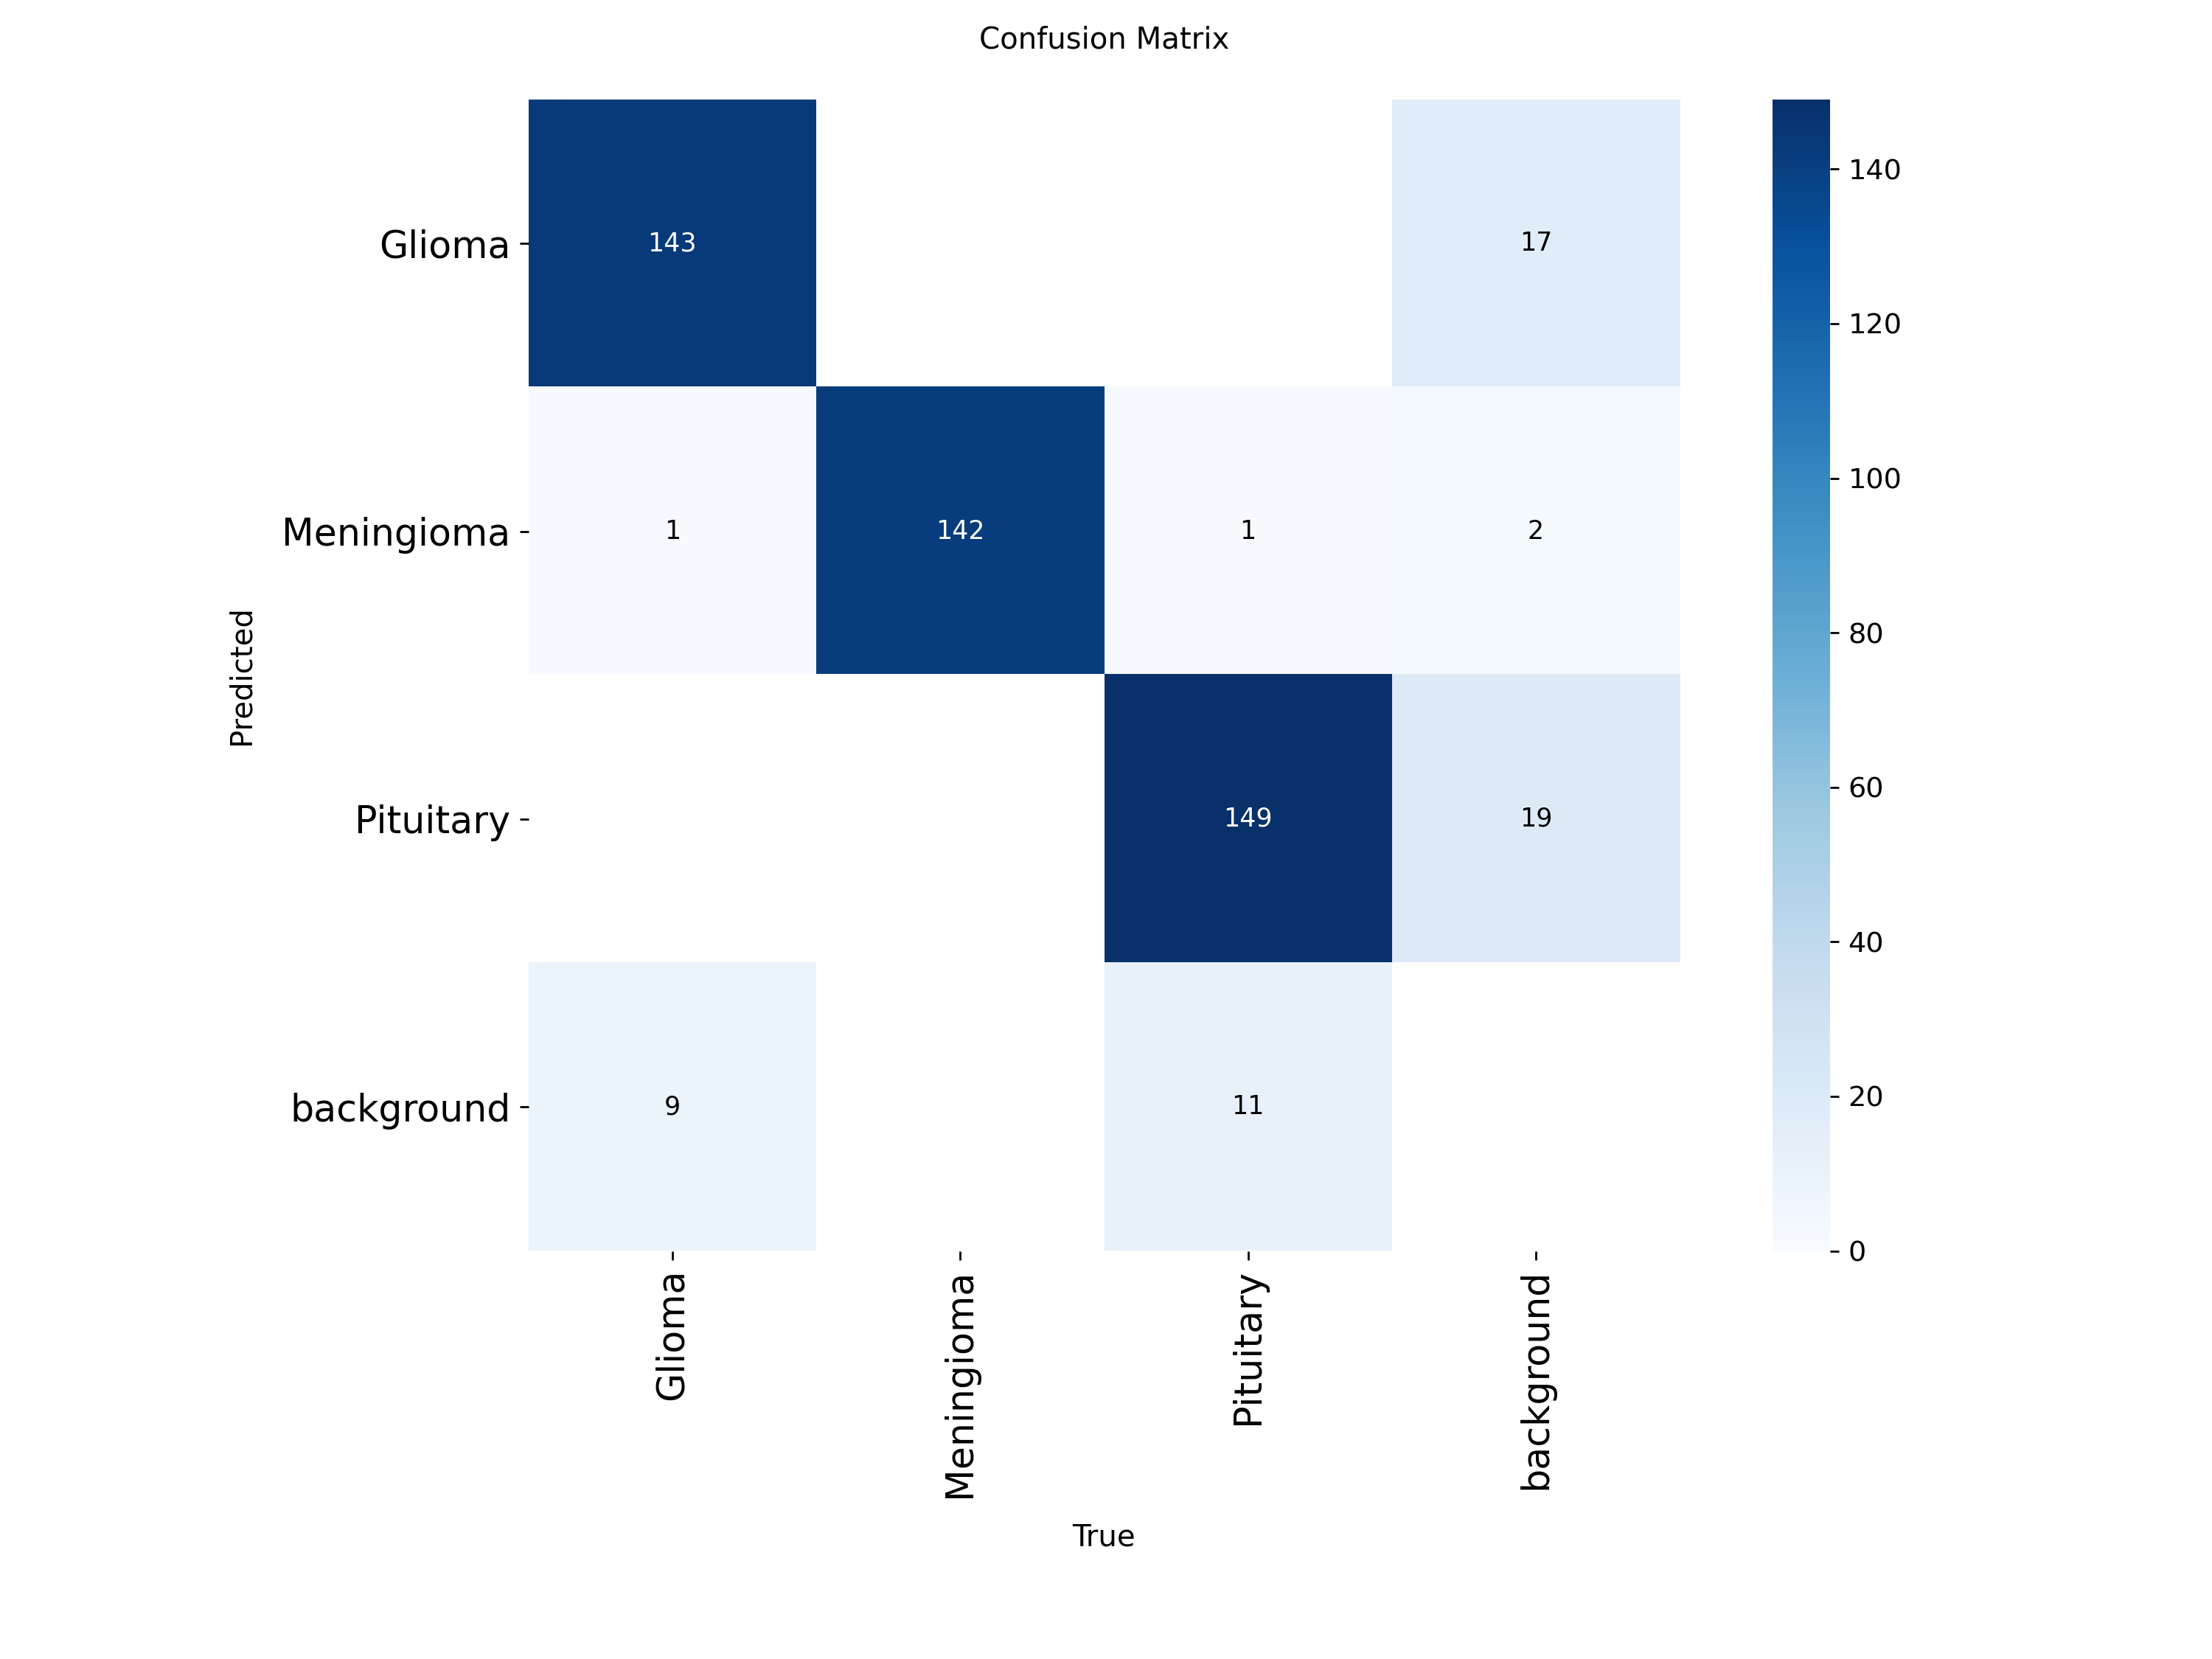


Displaying Performance Metrics:


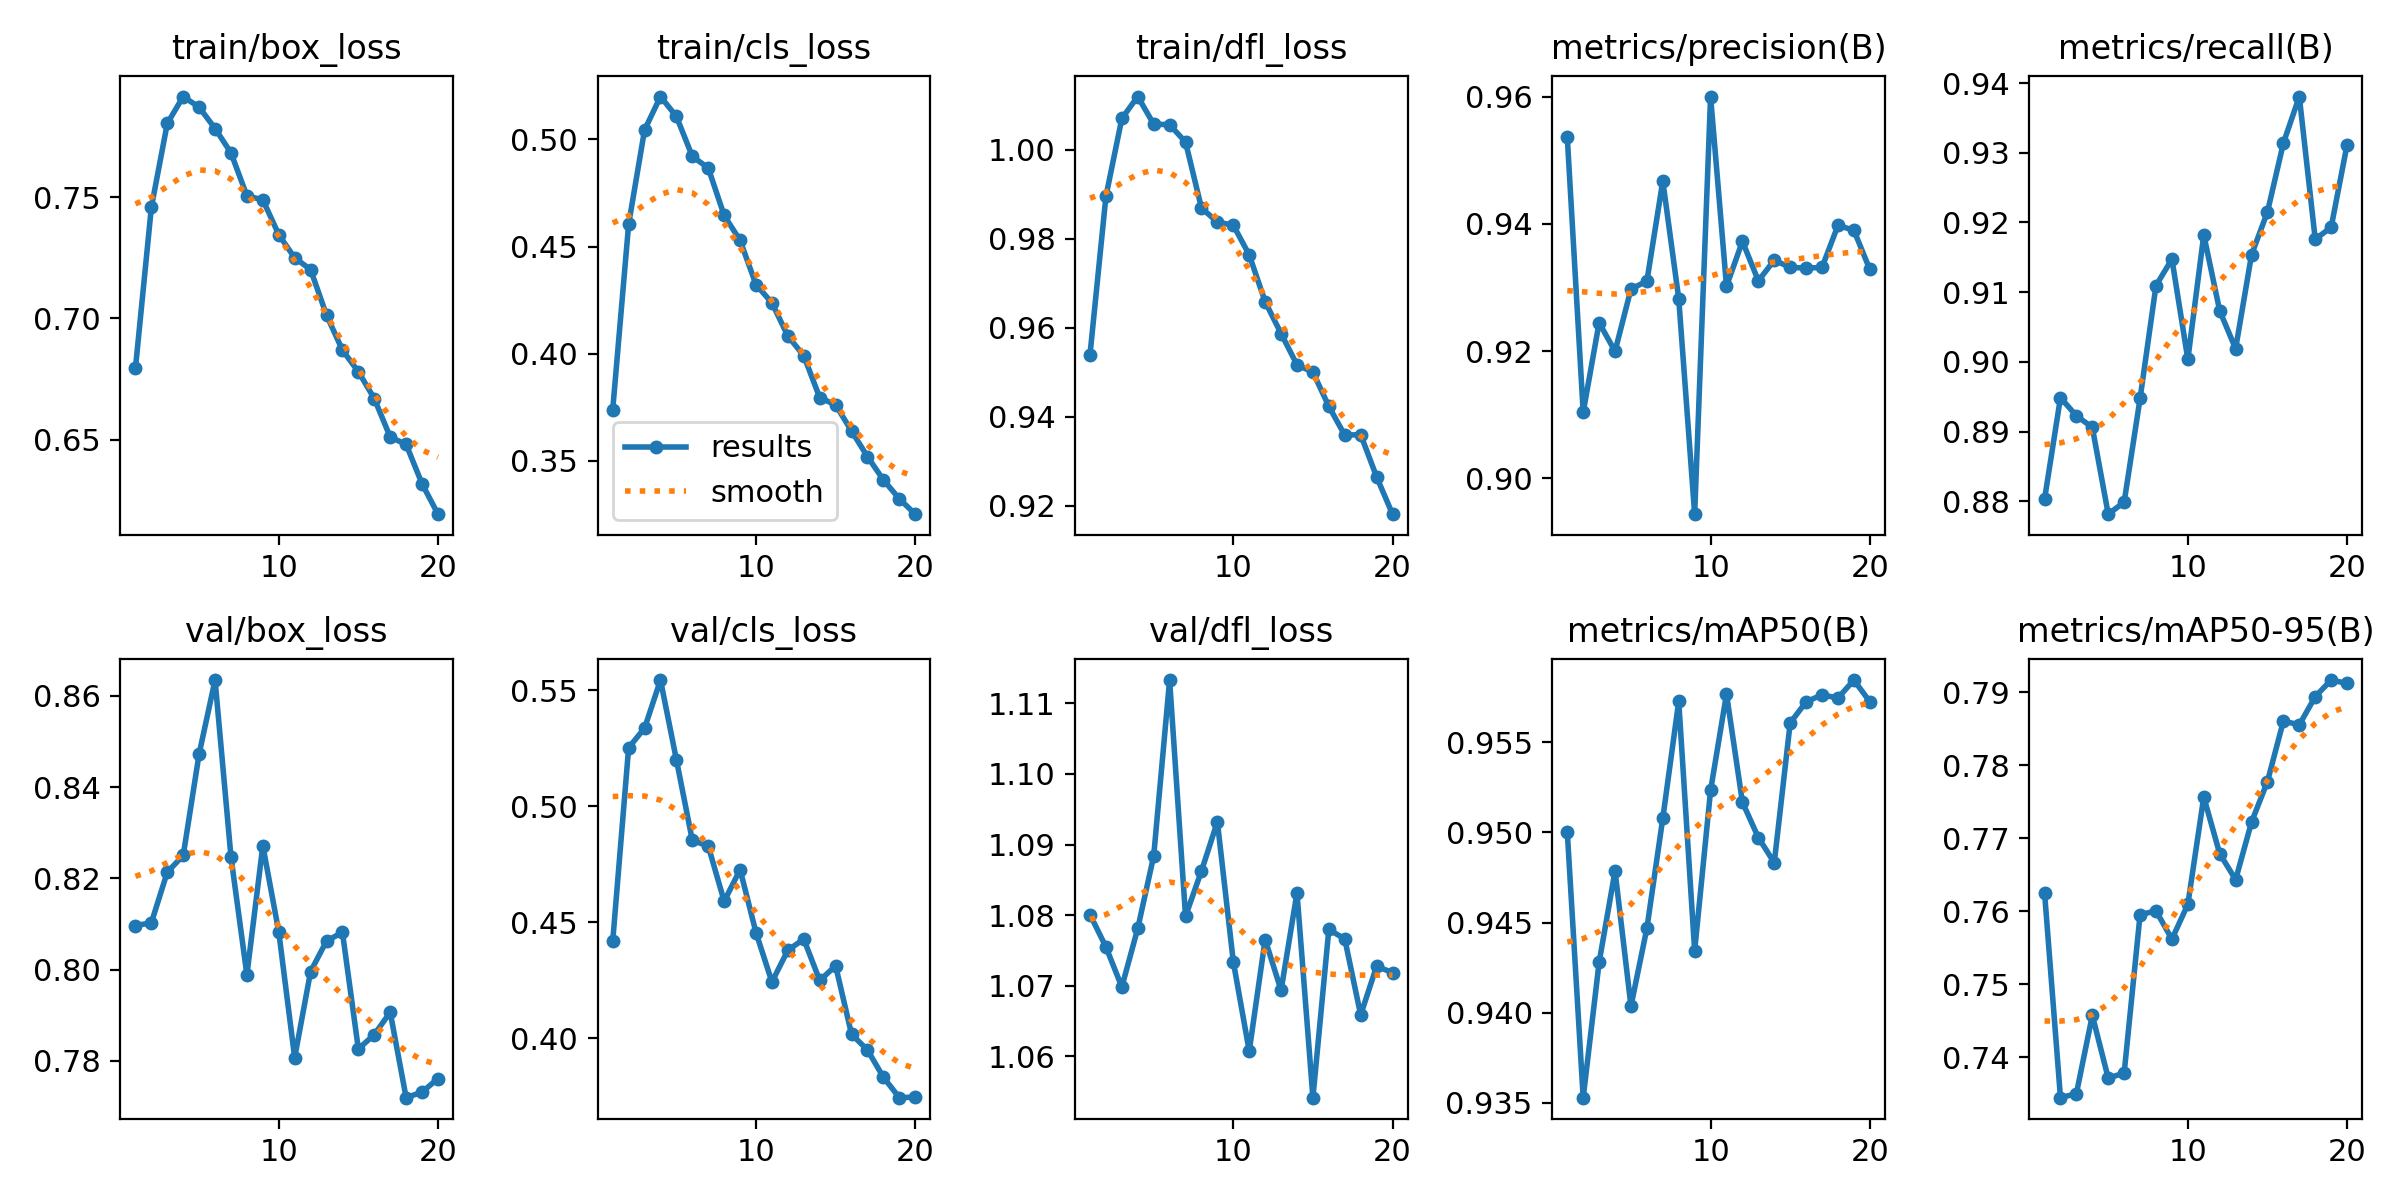

In [11]:
print("\nDisplaying Confusion Matrix:")
confusion_matrix_path = os.path.join(tuned_run_dir, 'confusion_matrix.png')
display(Image(filename=confusion_matrix_path))


print("\nDisplaying Performance Metrics:")
results_chart_path = os.path.join(tuned_run_dir, 'results.png')
display(Image(filename=results_chart_path))

--> Grafik belum menunjukan hasil convergence sama sekali, yang berarti masi banyak ruang improvement yang bisa dilakukan. Selain itu, Confusion Matrix menunjukan improvement dari baseline, yang dimana hasil predicted lebih banyak yang true dan lebih sedikit miss-classification.

In [12]:
import shutil

results_dir_to_zip = tuning_results.save_dir 
output_zip_filename = 'brain_tumor_detection_results_tune'
shutil.make_archive(output_zip_filename, 'zip', results_dir_to_zip)

'/kaggle/working/brain_tumor_detection_results_tune.zip'